In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define paths correctly
base_path = "/content/drive/MyDrive/dataset/plant_dataset"

input_path1 = f"{base_path}/anthra_1/1.anthracnose.csv"
input_path2 = f"{base_path}/anthra_1/2.anthracnose.csv"

input_path3 = f"{base_path}/Health_1/1.healthy.csv"
input_path4 = f"{base_path}/Health_1/2.healthy.csv"


input_path6 = f"{base_path}/Sooty_1/1.sooty mould.csv"
input_path7 = f"{base_path}/Sooty_1/2.sooty mould.csv"


input_path9 = f"{base_path}/Pow_1/1.powdermildew.csv"

# Read CSV files
data1 = pd.read_csv(input_path1)
data2 = pd.read_csv(input_path2)
data3 = pd.read_csv(input_path3)
data4 = pd.read_csv(input_path4)
data6 = pd.read_csv(input_path6)
data7 = pd.read_csv(input_path7)
data9 = pd.read_csv(input_path9)


In [53]:
data1.columns

Index(['Sr.No ', ' Integration Time', ' Reference Current', 'Diode 1',
       ' Diode 2', ' Diode 3', ' Diode 4', ' Diode 5', ' Diode 6', ' Diode 7',
       ' Diode 8'],
      dtype='object')

In [54]:
import pandas as pd


for df in [data1, data2, data3, data4,data6, data7,data9]:
    df.columns = df.columns.str.strip()


cols_to_drop = ['% Time Stamp', 'Integration Time', 'Reference Current', 'User Comment']
df1 = data1.drop(columns=cols_to_drop, errors='ignore')
df2 = data2.drop(columns=cols_to_drop, errors='ignore')
df3 = data3.drop(columns=cols_to_drop, errors='ignore')
df4 = data4.drop(columns=cols_to_drop, errors='ignore')
df6 = data6.drop(columns=cols_to_drop, errors='ignore')
df7 = data7.drop(columns=cols_to_drop, errors='ignore')
df9 = data9.drop(columns=cols_to_drop, errors='ignore')


df1["label"] = 'anthracnose'
df2["label"] = 'anthracnose'
df3["label"] = 'healthy'
df4["label"] = 'healthy'
df6["label"] = 'sooty mould'
df7["label"] = 'sooty mould'
df9["label"] = 'powdermildew'


df_data = pd.concat([df1, df2, df3, df4,df6, df7, df9], ignore_index=True)




In [55]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18786 entries, 0 to 18785
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sr.No    4596 non-null   float64
 1   Diode 1  18786 non-null  int64  
 2   Diode 2  18786 non-null  int64  
 3   Diode 3  18786 non-null  int64  
 4   Diode 4  18786 non-null  int64  
 5   Diode 5  18786 non-null  int64  
 6   Diode 6  18786 non-null  int64  
 7   Diode 7  18786 non-null  int64  
 8   Diode 8  18786 non-null  int64  
 9   label    18786 non-null  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 1.4+ MB


In [56]:
print(df_data.isnull().sum())

Sr.No      14190
Diode 1        0
Diode 2        0
Diode 3        0
Diode 4        0
Diode 5        0
Diode 6        0
Diode 7        0
Diode 8        0
label          0
dtype: int64


In [57]:
df_data.drop(columns=['Sr.No'], inplace=True, errors='ignore')

In [58]:
X = df_data.iloc[:, 0:8].values
X

array([[ 254,  286,  306, ...,  189,  177, 6311],
       [ 267,  298,  312, ...,  189,  175, 6710],
       [ 258,  290,  308, ...,  192,  180, 6365],
       ...,
       [ 380,  377,  437, ...,  308,  310, 7895],
       [ 370,  377,  437, ...,  307,  309, 7907],
       [ 375,  373,  433, ...,  301,  303, 8017]])

In [59]:
y = df_data.iloc[:,8].values
y = y.astype('int')
y

ValueError: invalid literal for int() with base 10: 'anthracnose'

In [34]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=80)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1]))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(len(label_encoder.classes_)))
model.add(Activation('softmax'))


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6, batch_size=16)

Epoch 1/6
1570/1570 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9397 - loss: 0.1877 - val_accuracy: 1.0000 - val_loss: 6.3133e-04
Epoch 2/6
1570/1570 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9999 - loss: 6.5923e-04 - val_accuracy: 1.0000 - val_loss: 9.5160e-05
Epoch 3/6
1570/1570 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 1.0000 - loss: 9.3471e-05 - val_accuracy: 1.0000 - val_loss: 2.9056e-05
Epoch 4/6
1570/1570 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9998 - loss: 3.9320e-04 - val_accuracy: 1.0000 - val_loss: 8.3492e-06
Epoch 5/6
1570/1570 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 1.0000 - loss: 2.8399e-05 - val_accuracy: 1.0000 - val_loss: 3.3731e-06
Epoch 6/6
1570/1570 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9999 - loss: 3.5490e-04 - val_accuracy: 1.0000 - val_loss: 5.4618e-06


In [43]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9954 - loss: 1.1435
test loss, test acc: [1.1441900730133057, 0.9952206611633301]


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [61]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=80)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

optimizer = Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6, batch_size=32)

Epoch 1/6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


785/785 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5245 - loss: 1.8547 - val_accuracy: 0.7731 - val_loss: 1.1675
Epoch 2/6
785/785 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7903 - loss: 1.1093 - val_accuracy: 0.9423 - val_loss: 0.7622
Epoch 3/6
785/785 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9165 - loss: 0.7510 - val_accuracy: 0.9855 - val_loss: 0.5296
Epoch 4/6
785/785 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9647 - loss: 0.5451 - val_accuracy: 0.9909 - val_loss: 0.3979
Epoch 5/6
785/785 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9778 - loss: 0.4264 - val_accuracy: 0.9949 - val_loss: 0.3191
Epoch 6/6
785/785 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9857 - loss: 0.3505 - val_accuracy: 0.9960 - val_loss: 0.2680


In [62]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

optimizer = Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4655 - loss: 1.8880 - val_accuracy: 0.7988 - val_loss: 1.1018
Epoch 2/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8300 - loss: 1.0367 - val_accuracy: 0.9771 - val_loss: 0.6897
Epoch 3/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9447 - loss: 0.6821 - val_accuracy: 0.9876 - val_loss: 0.4713
Epoch 4/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9778 - loss: 0.4886 - val_accuracy: 0.9941 - val_loss: 0.3587
Epoch 5/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9870 - loss: 0.3825 - val_accuracy: 0.9947 - val_loss: 0.2928
Epoch 6/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9894 - loss: 0.3212 - val_accuracy: 0.9954 - val_loss: 0.2507
Epoch 7/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9911 - loss: 0.2812 - val_accuracy: 0.9957 - val_loss: 0.2223
Epoch 8/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9905 - loss: 0.2513 - val_accuracy: 0.

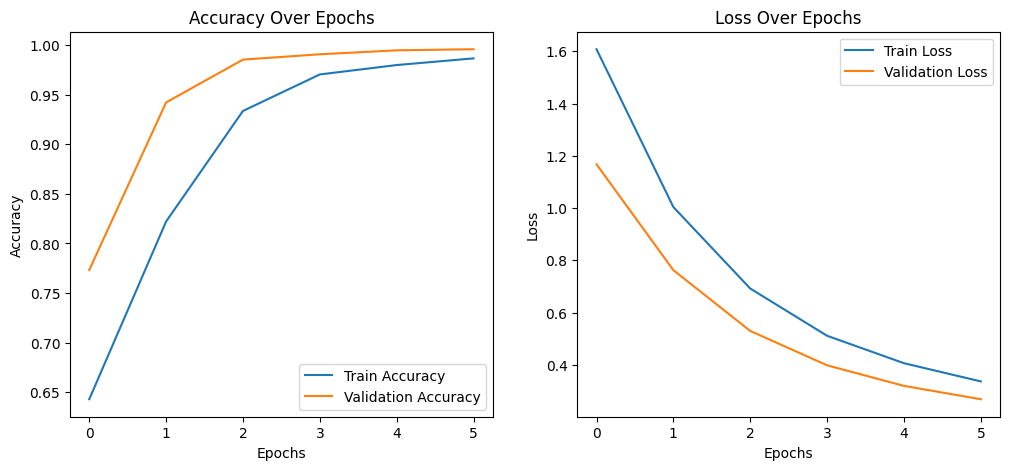

In [48]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

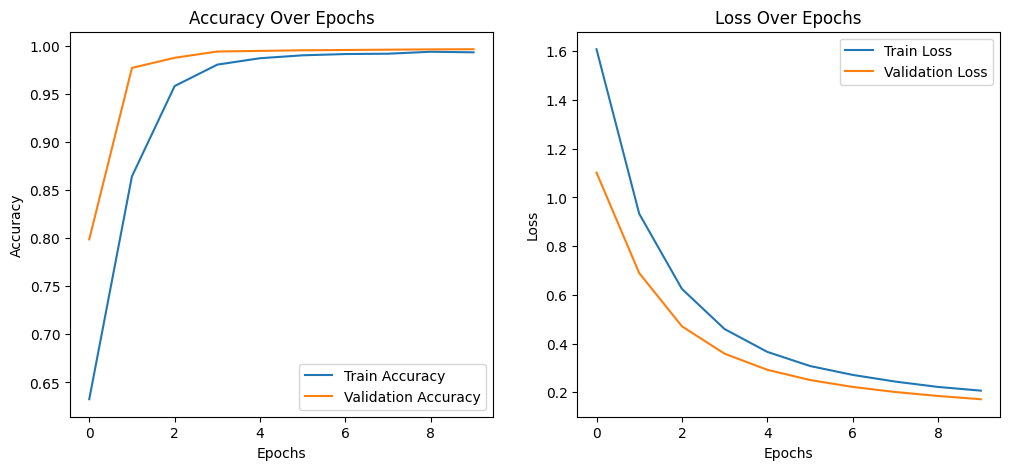

In [64]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [49]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9956 - loss: 0.2678
Test Accuracy: 0.9960
Test Loss: 0.2680
